In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
heart_df=pd.read_csv('dataset.csv')

In [7]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heart_df.shape

(303, 14)

data collection and pre-processing

In [9]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# checking the distribution of the data
heart_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 -  defective heart

0 - non defective heart

<AxesSubplot:xlabel='count', ylabel='target'>

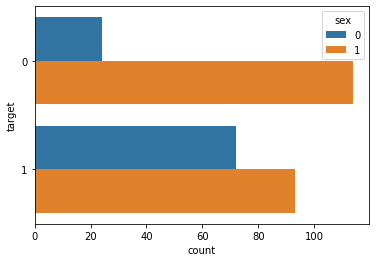

In [17]:
sns.countplot(hue=heart_df['sex'],y=heart_df['target'])


splitting the data into features and target

In [15]:
X=heart_df.iloc[:,:-1]
y=heart_df.iloc[:,-1]

splitting the data into training and test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y, random_state=2)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (212, 13) (91, 13)


In [15]:
model=LogisticRegression()

In [16]:
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred=model.predict(X_train)

In [18]:
score=accuracy_score(y_train,y_pred)

In [19]:
score

0.8443396226415094

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [33]:
dtc.fit(X_train,y_train)
ypred=dtc.predict(X_test)

In [34]:
score=accuracy_score(y_test,ypred)
score

0.7142857142857143

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn

KNeighborsClassifier()

In [38]:
knn.fit(X_train,y_train)
Ypred=dtc.predict(X_test)

In [39]:
score=accuracy_score(y_test,Ypred)
score

0.7142857142857143

In [48]:
y_tpred=model.predict(X_test)

In [49]:
score=accuracy_score(y_test,y_tpred)

In [50]:
score

0.8461538461538461

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_tpred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.89      0.82      0.85        50

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



#### building predictive system

In [26]:
input_data=[57,0,0,120,354,0,1,163,1,0.6,2,0,2]
np_data=np.asarray(input_data)
Re_data=np_data.reshape(1,-1)

prediction=model.predict(Re_data)
print(prediction)

if (prediction[0] == 0):
    print('the person is not suffering from heart disease')
else:
     print('the person is suffering from heart disease')

[1]
the person is suffering from heart disease


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
import pickle
filename="heartmod.sav"
loaded_mod=pickle.dump(model,open(filename,'wb'))